# Softmax Regression

This notebook demonstrates the Softmax function as the mutli-class extension of Logistic Regression. The softmax function takes a vector of real valued ouputs and converts them to a multinomial probablity distribution. In general the Softmax layer can be applied to different models, for example a multi-layer perceptron. In this notebook, we are using a linear model to classify the type of wines [0-2] based on various quantitative attributes.

In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
sns.set_theme()

### Dataset Setup

In [3]:
# Wine dataset is a built-in sklearn dataset.
wine = datasets.load_wine()

# extract input features and targets
X = pd.DataFrame(wine.data,columns=wine.feature_names)
y = pd.DataFrame(wine.target,columns=['label'])

# concat X and y to form the entire dataset
dataset = pd.concat((X, y),axis=1)

# Verify loaded dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
label                           178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [4]:
# Some sample entries in the data
print(dataset.head(5))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  label  
0           

In [5]:
# dataset statistics 
def classwise_means(df):
    """Prints classwise averages for attributes present in the dataset (df)."""
    print('Classes in dataset: ')
    class_labels = df['label'].unique()
    print(class_labels)
    print('\n')
    print('Class-wise Attribute Averages')
    print(df.groupby(['label']).mean())

classwise_means(pd.concat((X, y), axis=1))

Classes in dataset: 
[0 1 2]


Class-wise Attribute Averages
         alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
label                                                                   
0      13.744746    2.010678  2.455593          17.037288  106.338983   
1      12.278732    1.932676  2.244789          20.238028   94.549296   
2      13.153750    3.333750  2.437083          21.416667   99.312500   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
label                                                                     
0           2.840169    2.982373              0.290000         1.899322   
1           2.258873    2.080845              0.363662         1.630282   
2           1.678750    0.781458              0.447500         1.153542   

       color_intensity       hue  od280/od315_of_diluted_wines      proline  
label                                                                        
0             5.528305  1.062034         

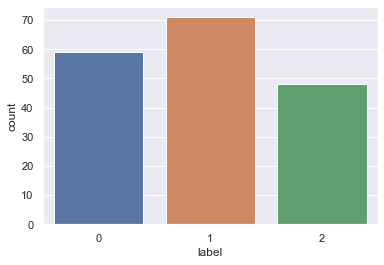

In [6]:
# Distribution of samples across classes
sns.countplot(x='label', data=dataset)
plt.show()

### Dataset Processing

In [7]:
# Train-Test split

# Following an 80-20 split on data.
# The dataset is shuffled with a random seed for reproducible results.
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=7, test_size=0.20)

print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

Number of train samples:  142
Number of test samples:  36


In [8]:
# Feature normalization
# Refer to https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Training and Predictions

#### Multi Class Logistic Regression 

For a multi_class problem, if multi_class is set to be “multinomial” the softmax function is used to find the predicted probability of each class. 

In [9]:
# Fit model to training data
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', tol=1e-6, max_iter=10000)
classifier.fit(X_train, np.squeeze(y_train))

LogisticRegression(max_iter=10000, multi_class='multinomial', tol=1e-06)

In [10]:
# Evaluate on test data 
y_pred = classifier.predict(X_test)

### Model Performance 

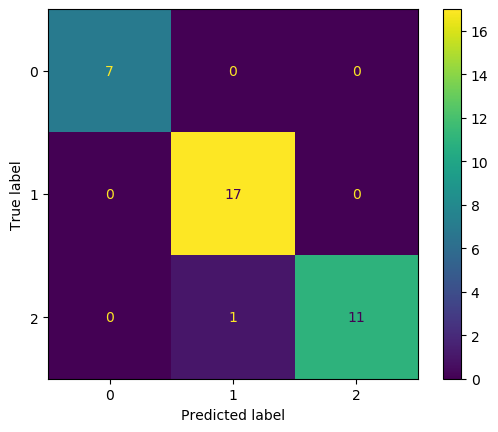

In [11]:
# Confusion Matrix
class_labels = dataset['label'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
# switch off Seaborn theme for CM plot
sns.reset_orig()
disp.plot()

In [12]:
# Performance Statistics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



The Softmax Regression model is able to obtain 97% accuracy on the test set. 